In [ ]:
# Комірка, автозгенерована Kaggle
# завантажує датасет, та модіфикована мною, показувати шлях завантаження

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
alessiocorrado99_animals10_path = kagglehub.dataset_download('alessiocorrado99/animals10')
print(f'Data source import complete. ({alessiocorrado99_animals10_path})')


Using Colab cache for faster access to the 'animals10' dataset.
Data source import complete. (/kaggle/input/animals10)


In [ ]:
#1. Завантажуємо датасет для роботи
# Встановлюємо keggle
! pip install kaggle

In [ ]:
# Монтуємо Google Drive
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
# Копіюємо завантажений датасет до робочої папки
! cp -r ../kaggle/input/animals10 ./
! ls

animals10  gdrive  sample_data


In [ ]:
#2. Розділяємо дані на навчальні та тестові
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_size = (227, 227)
batch_size = 32
extract_path="animals10/raw-img"
datagen = ImageDataGenerator(
    rescale=1.0/255, # Нормалізація
    validation_split=0.2 # 20% даних під валідацію
)
train_generator = datagen.flow_from_directory(
    extract_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)
val_generator = datagen.flow_from_directory(
    extract_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

#3. Створюємо шари нейромережі
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
model = Sequential([
    Input(shape=(227, 227, 3)),
    Conv2D(96, (11, 11), strides=4, activation='relu'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(256, (5, 5), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(384, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((3, 3), strides=2),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax') # 10 класів
])

from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=[ 'accuracy'])
print(model.summary())

#4. Навчаємо модель
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)

Found 20947 images belonging to 10 classes.
Found 5232 images belonging to 10 classes.


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 55, 55, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 27, 27, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 256)    │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 13, 13, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        40,970 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,324,746 (222.49 MB)

 Trainable params: 58,323,530 (222.49 MB)

 Non-trainable params: 1,216 (4.75 KB)

None
Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


655/655 ━━━━━━━━━━━━━━━━━━━━ 82s 106ms/step - accuracy: 0.2846 - loss: 2.8424 - val_accuracy: 0.4599 - val_loss: 1.5082
Epoch 2/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 54s 83ms/step - accuracy: 0.4840 - loss: 1.5406 - val_accuracy: 0.5269 - val_loss: 1.4079
Epoch 3/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 52s 80ms/step - accuracy: 0.5622 - loss: 1.3007 - val_accuracy: 0.5140 - val_loss: 1.4157
Epoch 4/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 51s 78ms/step - accuracy: 0.6201 - loss: 1.1295 - val_accuracy: 0.5096 - val_loss: 1.4862
Epoch 5/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 52s 80ms/step - accuracy: 0.6550 - loss: 1.0201 - val_accuracy: 0.6441 - val_loss: 1.0478
Epoch 6/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 54s 83ms/step - accuracy: 0.7031 - loss: 0.8857 - val_accuracy: 0.5875 - val_loss: 1.2606
Epoch 7/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 51s 78ms/step - accuracy: 0.7317 - loss: 0.7963 - val_accuracy: 0.3928 - val_loss: 2.1562
Epoch 8/30
655/655 ━━━━━━━━━━━━━━━━━━━━ 53s 80ms/step - accuracy: 0.7634 - loss: 0.7020 - val_accura

164/164 ━━━━━━━━━━━━━━━━━━━━ 8s 50ms/step - accuracy: 0.7406 - loss: 1.2663
Точність на валідації: 0.7510
Втрати (Loss): 1.1969


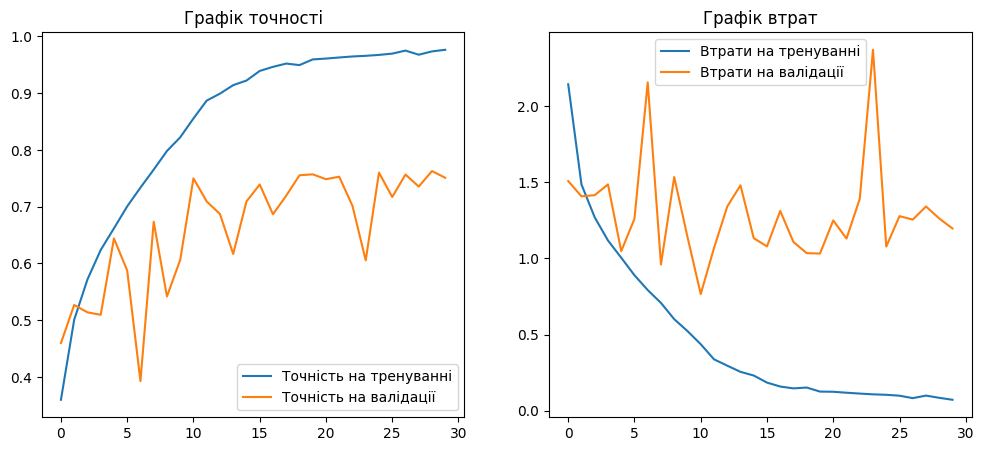

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
[[8.1798795e-08 2.1097815e-08 2.4160420e-07 1.5664443e-06 1.1062903e-03
  1.3149769e-05 2.6794753e-08 1.8875859e-07 5.0442691e-07 9.9887794e-01]]


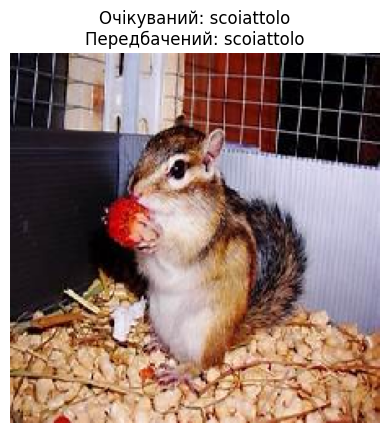

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Результати збережені у classification_results.csv


In [ ]:
#5. Виводимо точність та втрати
loss, accuracy = model.evaluate(val_generator)
print(f"Точність на валідації: {accuracy:.4f}")
print(f"Втрати (Loss): {loss:.4f}")

#6. Будуємо графіки точності та втрати
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Точність на тренуванні')
plt.plot(epochs_range, val_acc, label='Точність на валідації')
plt.legend()
plt.title('Графік точності')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Втрати на тренуванні')
plt.plot(epochs_range, val_loss, label='Втрати на валідації')
plt.legend()
plt.title('Графік втрат')
plt.show()

#7. Перевіряємо розпізнавання на випадковому зображенні
import numpy as np
import random
import os
from tensorflow.keras.preprocessing import image
class_names = list(train_generator.class_indices.keys())
random_class = random.choice(class_names)
random_image_path = random.choice(os.listdir(f"{extract_path}/{random_class}"))
img_path = f"{extract_path}/{random_class}/{random_image_path}"
img = image.load_img(img_path, target_size=(227, 227))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
print(predictions)
predicted_class = class_names[np.argmax(predictions)]
plt.imshow(img)
plt.axis('off')
plt.title(f"Очікуваний: {random_class}\nПередбачений: {predicted_class}")
plt.show()


import os
import random
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing import image
num_images = 1024
batch_size = 128
output_csv = "classification_results.csv"
all_images = []
for class_name in os.listdir(extract_path):
    class_dir = os.path.join(extract_path, class_name)
    if os.path.isdir(class_dir):
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            all_images.append((img_path, class_name))
selected_images = random.sample(all_images, num_images)
def load_batch(image_data):
    images = []
    paths = []
    true_classes = []
    for img_path, true_class in image_data:
        img = image.load_img(img_path, target_size=(227, 227))
        img_array = image.img_to_array(img) / 255.0
        images.append(img_array)
        paths.append(img_path)
        true_classes.append(true_class)
    return np.array(images), paths, true_classes

results = []
for i in range(0, num_images, batch_size):
    batch_data = selected_images[i:i+batch_size]
    batch_images, batch_paths, batch_true_classes = load_batch(batch_data)
    predictions = model.predict(batch_images)
    predicted_classes = np.argmax(predictions, axis=1)
    for j in range(len(batch_paths)):
        results.append([batch_paths[j], batch_true_classes[j], class_names[predicted_classes[j]]])

df = pd.DataFrame(results, columns=["Шлях до файлу", "Справжній клас", "Розпізнаний клас"])
df.to_csv(output_csv, index=False, encoding="utf-8")
print(f"Результати збережені у {output_csv}")